# EXPLORATORY DATA ANALYSIS

#### Stop any previous spark session that may be running

In [12]:
try:
    sc.stop()
except:
    pass

#### Initialize a new spark session for current task

In [2]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('Capstone_Project').setMaster('local[4]')
sc = SparkContext.getOrCreate(conf = conf)

from pyspark.sql import SparkSession 
from pyspark.sql.types import StructField, StringType, IntegerType, StructType
spark = SparkSession.builder.appName('Capstone_SQL').getOrCreate()

### Load Datasets

In [3]:
sp = spark.read.csv('file:///home/hadoop/Spotify2020.csv', inferSchema=True, header=True)

sp.cache()          

DataFrame[_c0: int, artist_name: string, popularity: int, track_id: string, track_name: string, uri: string, acousticness: double, danceability: double, duration_ms: int, energy: double, instrumentalness: double, key: int, liveness: double, loudness: double, mode: int, speechiness: double, tempo: double, time_signature: int, valence: double]

Closer look into the schema of the dataset

In [4]:
sp.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- artist_name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- track_id: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- uri: string (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: integer (nullable = true)
 |-- valence: double (nullable = true)



Will used  packages in getting more insight into the dataset

Loading data using pandas

In [1]:
import pandas as pd

df = pd.read_csv('Spotify2020.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,artist_name,popularity,track_id,track_name,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,SZA,92,3YJJjQPAbDT7mGpX3WtQ9A,Good Days,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,0.499,0.4360,279204,0.655,0.000008,1,0.6880,-8.370,0,0.0583,121.002,4,0.4120
1,Hammock,35,51TAp7p7B3xboCl5HWmEkF,Longest Year - 2020,spotify:artist:0VOR7Ie9xUSb45fzIIVJQ1,0.700,0.0692,533707,0.285,0.673000,2,0.1990,-14.854,1,0.0482,78.572,4,0.0312
2,24kGoldn,95,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),spotify:artist:6fWVd57NKTalqvmjRd2t8Z,0.221,0.7000,140526,0.722,0.000000,7,0.2720,-3.558,0,0.0369,90.989,4,0.7560
3,Hammock,40,79hqdNpnWPVVxmZiDfKaIL,Dark Beyond the Blue - 2020,spotify:artist:0VOR7Ie9xUSb45fzIIVJQ1,0.729,0.2000,325680,0.282,0.887000,2,0.0837,-19.803,0,0.0468,74.381,3,0.0372
4,CJ,93,5vGLcdRuSbUhD8ScwsGSdA,Whoopty,spotify:artist:7arQA31aZVS8yS6zUveWzb,0.190,0.7110,123429,0.598,0.000000,3,0.1500,-7.621,0,0.1820,140.175,4,0.7370


In [2]:
df.columns # to easily read all columns

Index(['artist_name', 'popularity', 'track_id', 'track_name', 'uri',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

#### Check for null values

In [3]:
df.isnull().sum()

artist_name         0
popularity          0
track_id            0
track_name          0
uri                 0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

## DATA CLEANING 

Removing songs with no artist name or no title

In [4]:
df = df[df.artist_name != 'Not Applicable,']
df = df[df.artist_name != 'Not Applicable']
df = df[df.track_name != 'Not Applicable,']
df = df[df.track_name != 'Not Applicable']

Save new data to local disk

In [5]:
df.to_csv('Spotify2020_2.csv')

### Answering some questions of interests. Let's get more insights.

Top 10 most most popular songs 

In [11]:
df.sort_values(by='popularity', ascending=False).head(10)[['artist_name', 'popularity', 'track_id', 'track_name']]

,artist_name,popularity,track_id,track_name
2,24kGoldn,95,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior)
12,The Weeknd,95,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights
104,KAROL G,94,7vrJn5hDSXRmdXoR30KgF1,BICHOTA
28,Bad Bunny,94,47EiUVwUp4C9fGccaPuUCS,DÁKITI
6,Ariana Grande,94,35mvY5S1H3J2QZyna3TFe0,positions
72,Bad Bunny,93,2XIc1pqjXV3Cr2BQUGNBck,LA NOCHE DE ANOCHE
10,The Kid LAROI,93,27OeeYzk6klgBh83TSvGMA,WITHOUT YOU
4,CJ,93,5vGLcdRuSbUhD8ScwsGSdA,Whoopty
16,Billie Eilish,92,54bFM56PmE4YLRnqpW6Tha,Therefore I Am
0,SZA,92,3YJJjQPAbDT7mGpX3WtQ9A,Good Days


Top 10 songs most suited to dancing

In [35]:
df.sort_values(by='danceability', ascending=False).head(10)[['artist_name', 'track_id', 'track_name', 'danceability']]

,artist_name,track_id,track_name,danceability
237,347aidan,6Pgmqg15yVexuOgtzuxwoX,Dancing in My Room,0.980
1663,Championxiii,1eDyjPYw65g3wvQ7xJLF5c,BOO!,0.974
223,Black Eyed Peas,1zLBsSVxETQOfINOLYvT5m,GIRL LIKE ME,0.965
1544,Young T & Bugsey,3AMxuq6id3YGB57eWeheZQ,Don't Rush (feat. DaBaby),0.959
1927,Boosie Badazz,2ZXXkCrync6XGUS6IT9Bvd,Mop Wit It,0.958
1317,Kenndog,5lNsNowjCKqgafSWE7Ie2Z,Drip Like ME,0.956
231,Erica Banks,78xj07VVFK5uHTaGPIu13S,Buss It,0.956
1645,Sada Baby,1IlJZCRthVEPlksVzj3JWY,Whole Lotta Choppas (Remix) [feat. Nicki Minaj],0.956
1512,T.I.,5W3z7a1dBlERTBAye0murh,Pardon (feat. Lil Baby),0.955
270,Saweetie,4Hpib09wXgD84w4uwTPnYD,Tap In,0.954


Top 10 songs with high duration 

In [36]:
df.sort_values(by='duration_ms', ascending=False).head(10)[['artist_name', 'track_id', 'track_name', 'duration_ms']]

,artist_name,track_id,track_name,duration_ms
479,Soulwax,3E3IUPXd3EovxCo5mcRQtW,NY Lipps - Dries Van Noten 2020 Remix,842311
275,Johann Strauss II,5431KRbZtVF3tVgMR1lIYS,"An der schönen blauen Donau, Walzer, Op. 314",622227
1758,Josef Strauss,2AEHkWSJzhEZcJLi5w8SHw,"Dynamiden, Walzer, Op. 173",622147
1581,Johann Strauss II,4LEuXmZoXEf7tiQIdcq7Fz,"Seid umschlungen, Millionen! Walzer, Op. 443",605053
1467,DSF,5aeguwqH38xxYIFVBsucRm,Take a Ride,593000
1433,Johann Strauss II,7Md2QwuFexCbt9w2rfMZCj,"Wo die Zitronen blüh'n, Walzer, Op. 364",565013
1,Hammock,51TAp7p7B3xboCl5HWmEkF,Longest Year - 2020,533707
924,Ben Böhmer,6DtwPyMqylx1cdfvo3I2ET,Breathing - Boris Brejcha Remix (Mixed),499625
1231,Nico Szabo,3vFsUoi4KR8k5AWlPAGIj2,Raccoon,495738
1192,Aurosonic,4F0yK9EVX4qOoXpfULB6aP,Can I Count On You (Mixed),491520


Top 10 songs that are likely performed lived

In [37]:
df.sort_values(by='liveness', ascending=False).head(10)[['artist_name', 'track_id', 'track_name', 'liveness']]

,artist_name,track_id,track_name,liveness
1931,Paul Carrack,7vR1pmUWh9vlsz7ZAETBJm,"What's Going On - Live in Holland, 2012",0.990
1937,Paul Carrack,38eRrLmKJFqUrmeECOrvMf,"How Long - Live at Symphony Hall, Birmingham, ...",0.981
1310,Jorma Kaukonen,0dskvZGI1LOeuklVVr7t9h,Too Many Years - Live - Show 1,0.974
1933,Paul Carrack,4E4dkGHKb4KpZX0VDfccUj,Silent Running - Live at Shepherd's Bush Empir...,0.971
712,David Bowie,3KLU3rwnH7rdjuXgvGvubX,Seven Years In Tibet - Live at Radio City Musi...,0.960
1891,Epic Soundscapes,7rQ1E6bl6UMhrRhf8quVIR,Heavy Rain,0.953
1553,Allen Watts,0dKCPD0xCtAvq7wvQ8l3NM,Another You,0.926
1480,Creatress,1TYHz90DiG6VARt4hjopOF,Steady Forest Rain,0.913
1015,Johann Strauss I,2TPiVQ1dcV5DWloRkyQCng,"Radetzky-Marsch, Op. 228",0.904
103,Tom Fall,6TH0oIxOV08GkIntJDsB6S,Arcadia (Year in Review 2020),0.900


Top 10 loudest songs

In [38]:
df.sort_values(by='loudness', ascending=False).head(10)[['artist_name', 'track_id', 'track_name', 'loudness']]

,artist_name,track_id,track_name,loudness
1438,SUSU,3V1hoe2RGOieLpOcSiku0Q,POOP (SHIT),1.112
1464,Lil Darkie,382QN9BKDfw4omKUWWevj8,drink my piss you nasty slut yeah yeah,0.977
1879,Flume,4nlvKIIetOWGIMyhjQXgOZ,The Difference,-1.148
1682,Workout Music,4PuHzntmfWwlmT5FOaLPxO,Good as Hell (Remix),-1.331
1807,Kobaryo,5jwNrgDL8Zl44gINkTz1ry,HAPPY NEW BPM 2020,-1.446
1450,Sada Baby,6hLZzCS4E7AWo3PRBWy6az,Whole Lotta Choppas,-1.887
1563,Ryuji Imaichi,1wexDUeABroUnl55hTHM7W,Angel,-1.985
1411,Rauw Alejandro,22Sh5dlwbERqJAq1fZk5b2,De Cora <3,-2.028
512,Lund,4W8sUeokQKfHt1uTXp0Jq0,Broken,-2.052
489,The Distillers,1uXbBsJ14Uni9zqWgC7hgk,The Blackest Years - 2020 Remaster,-2.133


Top 10 songs with high valence (sound more positive (e.g. happy, cheerful, euphoric))

In [39]:
df.sort_values(by='valence', ascending=False).head(10)[['artist_name', 'track_id', 'track_name', 'valence']]

,artist_name,track_id,track_name,valence
437,Simon Patterson,45urCkpNGy4NOMo3pswqUX,Close My Eyes (Mixed),0.978
632,Workout Music,2TSUxzMC1BPOs85maWSQRn,Memories (Remix),0.977
524,Greg Sletteland,1QD7KtRE3D1IUHhPsSRpz5,I Have a Dream (Deep House Dance Party Remix),0.971
77,Armin van Buuren,7bPhqHzOvdsw5y6reuJz52,A State Of Trance (ASOT 991) - ASOT Tune Of Th...,0.969
1271,Shawn Mendes,6Xg5Fb4zeX8PYNu616N00s,There's Nothing Holdin' Me Back,0.968
1530,The Cog is Dead,3XXdUoZgGdizG5AtHdRMbJ,Let Me Be Your Man (Remastered 2020),0.968
1942,DaBaby,0oT9ElXYSxvnOOagP9efDq,JUMP (feat. YoungBoy Never Broke Again),0.966
1874,Workout Music,4ZzfKwqPfy02fpQxuh9Zz3,RITMO (Bay Boys For Life) [Remix],0.965
762,Camilo,7D7EH7MGyNHWSkqrszerI1,BEBÉ,0.965
897,Lele Pons,11EnQRgRMJwMAesfkB5pnu,Se Te Nota (with Guaynaa),0.963


Top 10 songs with low valence (sound more positive (e.g. sad, depressed, angry))

In [40]:
df.sort_values(by='valence', ascending=True).head(10)[['artist_name', 'track_id', 'track_name', 'valence']]

,artist_name,track_id,track_name,valence
1141,Water Sound Natural White Noise,5pGBDKBaR63vuJ4g8ialcU,Deep Sleep Recovery Noise,0.00000
459,No Spirit,3YYni1jodOmekz697cuwhl,It’s Been A Year,0.00000
1891,Epic Soundscapes,7rQ1E6bl6UMhrRhf8quVIR,Heavy Rain,0.00001
1480,Creatress,1TYHz90DiG6VARt4hjopOF,Steady Forest Rain,0.00001
1578,Om Zone,3pchfsGm7eRAAwayVhcwbI,Reaching Zen (Tibetan Bells & Soft Rain),0.02790
1,Hammock,51TAp7p7B3xboCl5HWmEkF,Longest Year - 2020,0.03120
1678,White Noise Baby Sleep Music,0B3u8uGCtDNqNaksqFHpku,Feel the Rhythm of and Yet More Pink Soft Comp...,0.03220
224,Jai Wolf,4Baa1yEJu3DXUosUZKVmcw,Indian Summer - 2020 Encore Mix,0.03260
131,Arkham Knights,0LlGOhlqWyhdCnbBylEgcj,Closing In (Year in Review 2020),0.03280
168,Above & Beyond,0Vguplc2NY847TZgf70w2W,Surrender (Year in Review 2020) - Genix Remix,0.03310


### Visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Distribution plot of target data

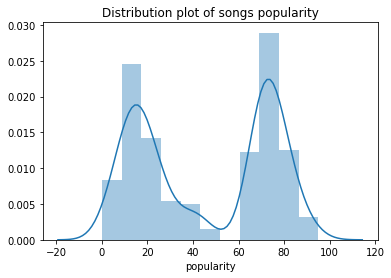

In [7]:
sns.distplot(df.popularity)
plt.title("Distribution plot of songs popularity")
plt.show()

Based on the curve, I will create two classes of popularity: Not_Popular = (0, 60) and Popular = (60, 100).

To use Logistics Regression, data is not a gaussian (normal) distribution.

Top 10 popular artists

C:\Users\oyeoy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



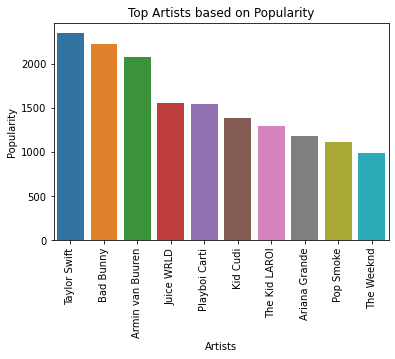

In [32]:
x = df.groupby("artist_name")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists based on Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)
plt.show()

Top 10 popular songs

C:\Users\oyeoy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



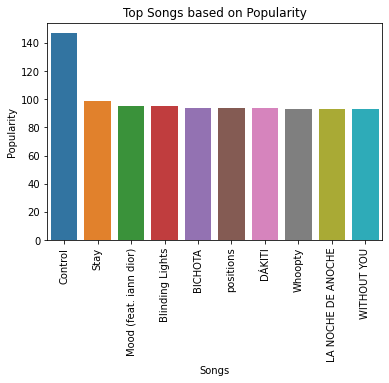

In [33]:
y = df.groupby("track_name")["popularity"].sum().sort_values(ascending=False).head(10)
ay = sns.barplot(y.index, y)
ay.set_title('Top Songs based on Popularity')
ay.set_ylabel('Popularity')
ay.set_xlabel('Songs')
plt.xticks(rotation = 90)
plt.show()

Visualization of the correlation between the audio features

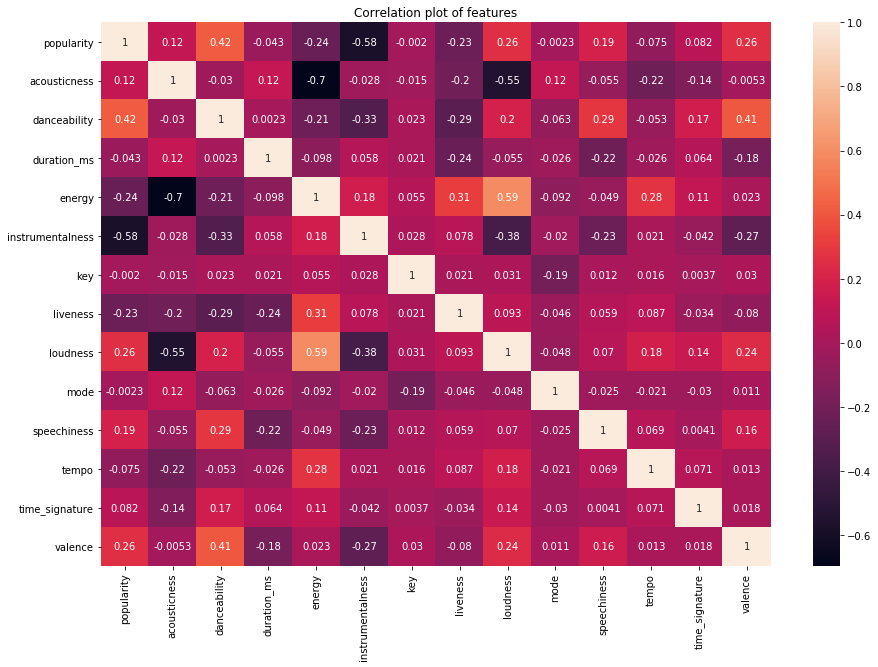

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation plot of features")
plt.show()

Visualization of the distribution between the audio features

<Figure size 1440x1080 with 0 Axes>

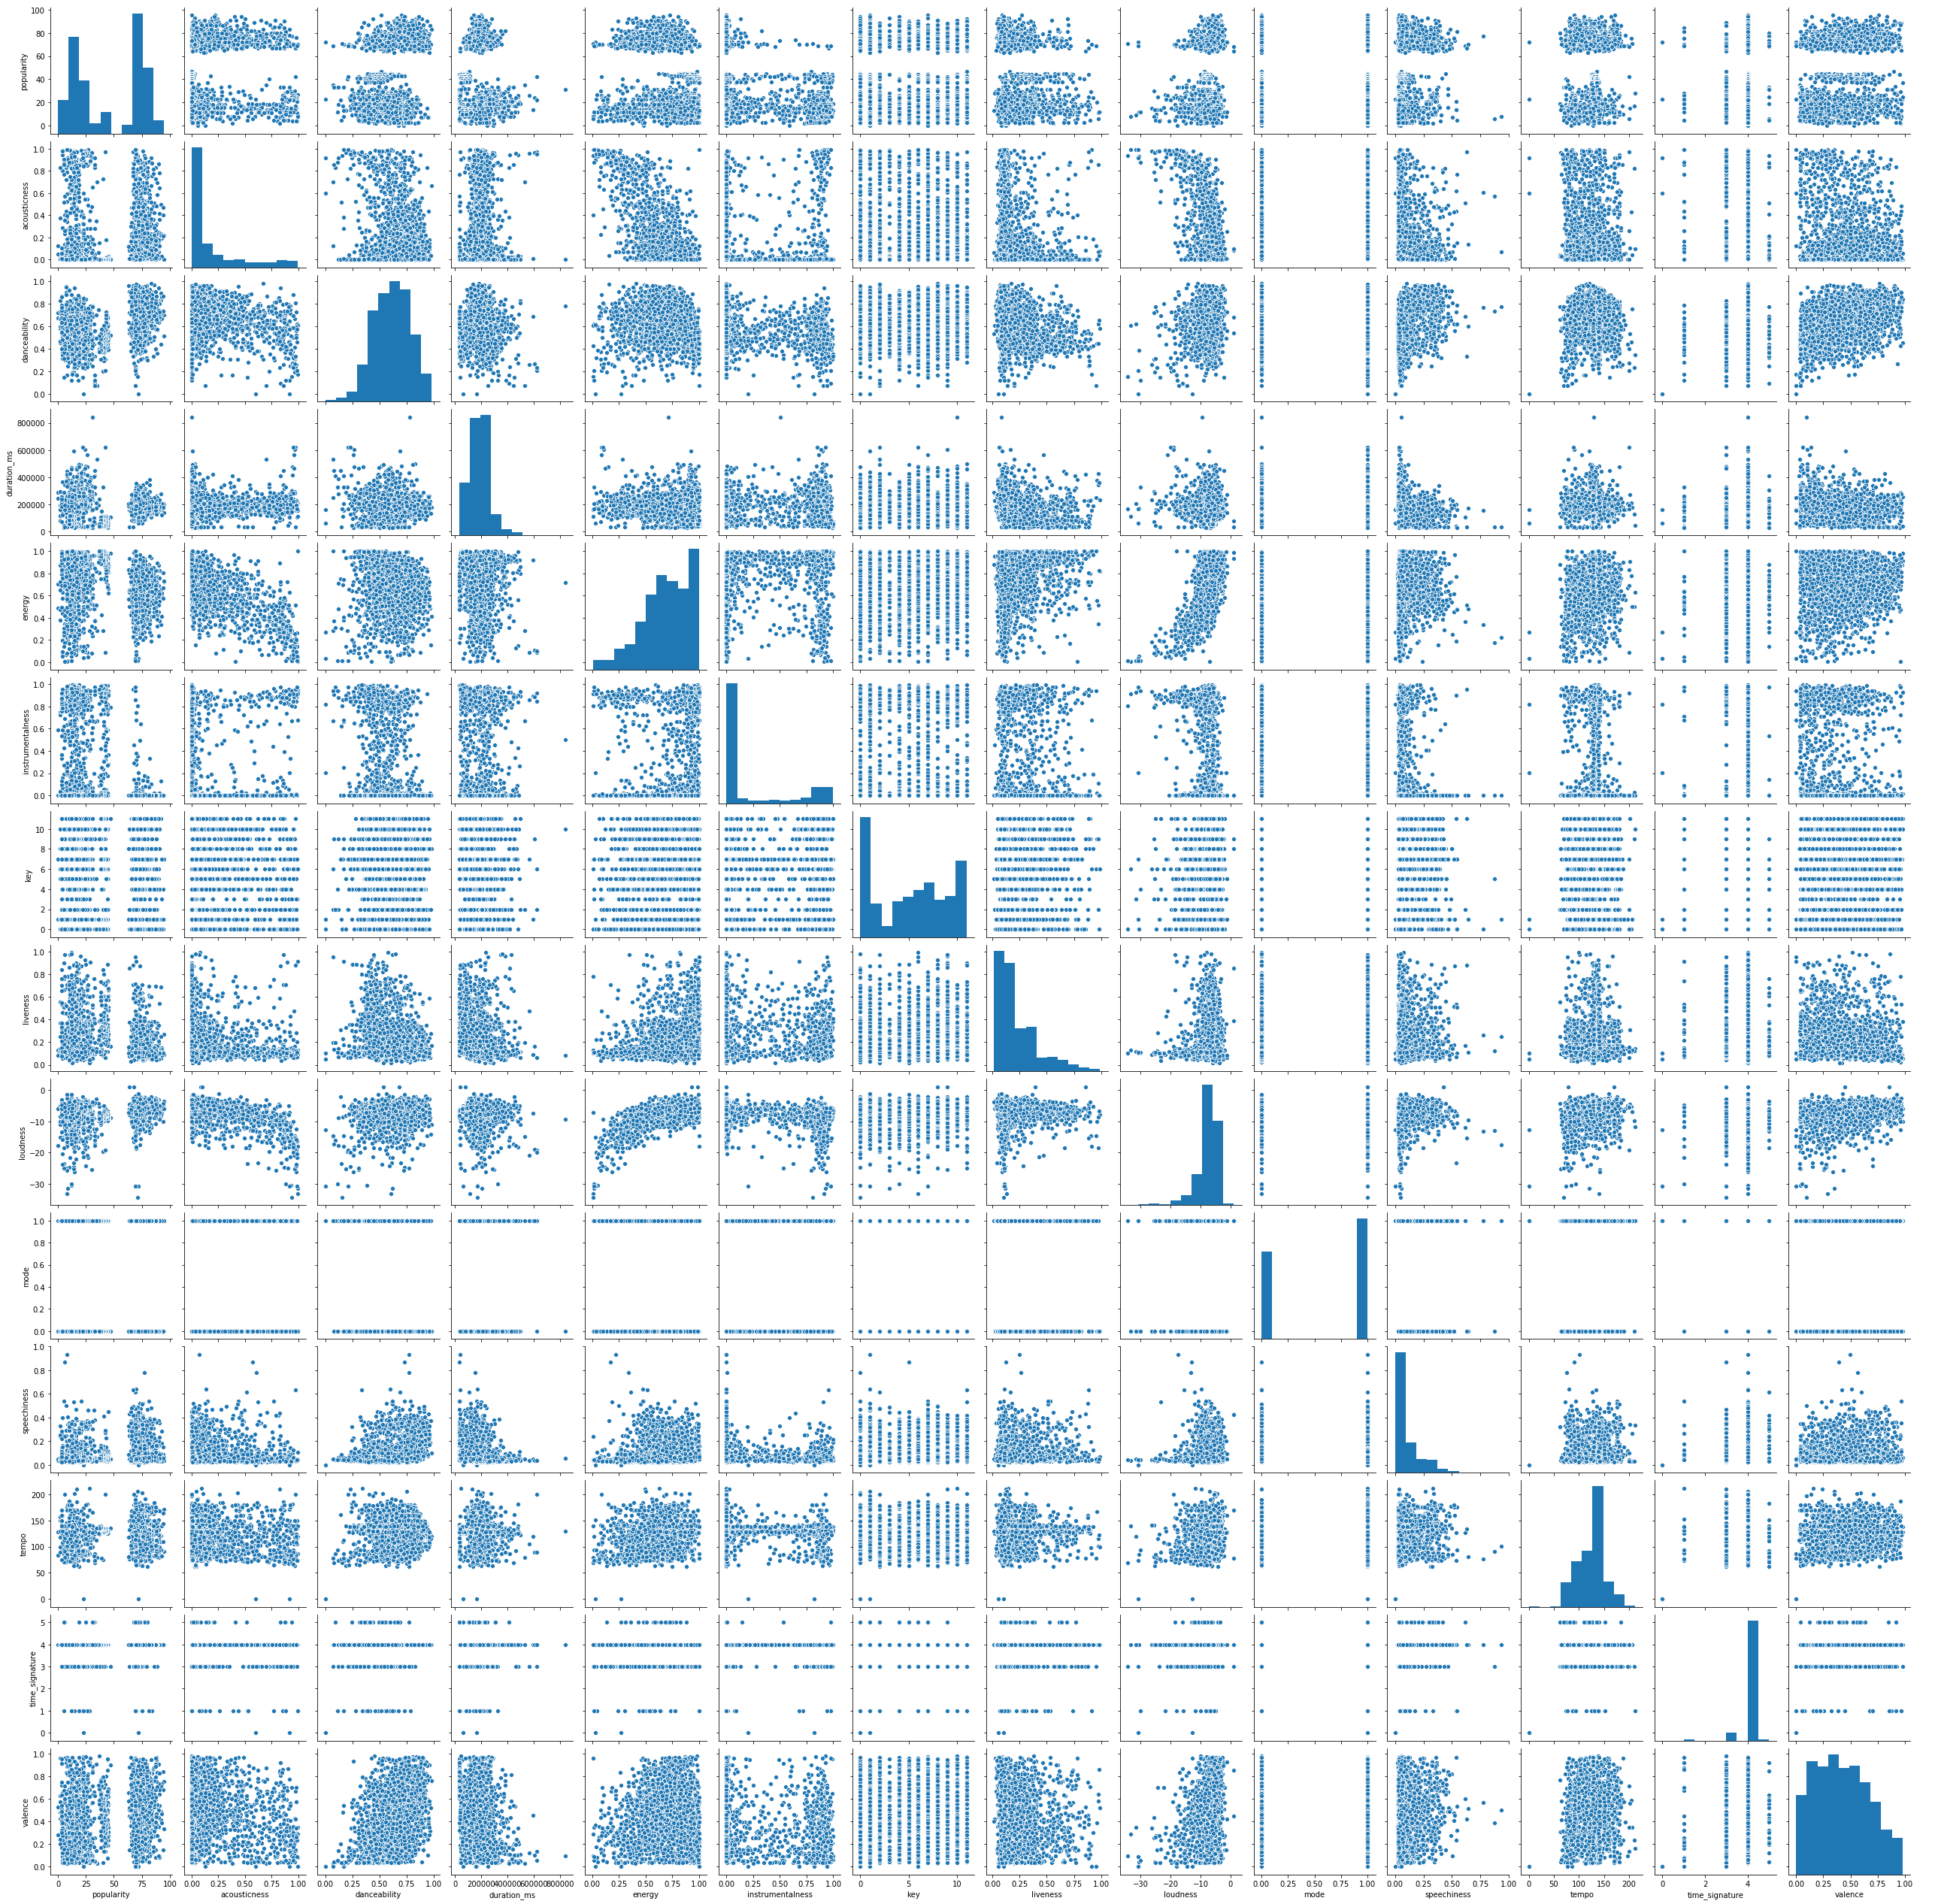

In [51]:
plt.figure(figsize=(20, 15))
sns.pairplot(df)
plt.show()

#### Three categorical columns found: Key, mode and time_signature

Some linear relationship noticeable are:

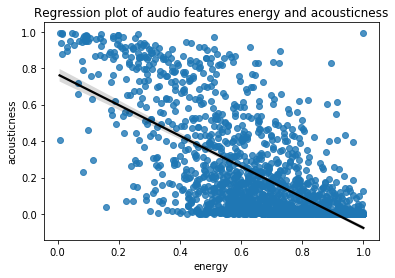

In [9]:
sns.regplot(x='energy', y='acousticness', data=df, line_kws={'color':'black'})
plt.title("Regression plot of audio features energy and acousticness")
plt.show()

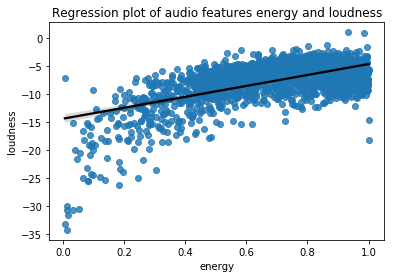

In [10]:
sns.regplot(y='loudness', x='energy', data=df, line_kws={'color':'black'})
plt.title("Regression plot of audio features energy and loudness")
plt.show()

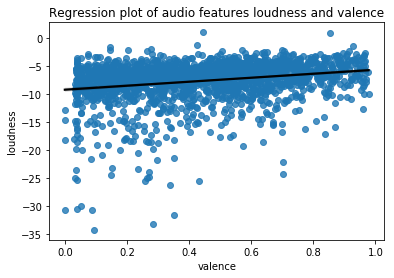

In [11]:
sns.regplot(y='loudness', x='valence', data=df, line_kws={'color':'black'})
plt.title("Regression plot of audio features loudness and valence")
plt.show()

# Hypothesis Testing

## 1) Is song popularity normally distributed?

To answer this question, I will be using the Shapiro-Wilk Normality Test

In [16]:
from scipy.stats import shapiro

print("\nUsing Shapiro-Wilk Normality Test \n")
print("H0: the sample has a Gaussian distribution. \n")
print("H1: the sample does not have a Gaussian distribution \n")

stat, p = shapiro(df.popularity)
print('stat=%.3f, p=%.3f' % (stat, p), "\n")
if p > 0.05:
    print('Popularity is probably Gaussian')
else:
    print('Popularity is probably not Gaussian')


Using Shapiro-Wilk Normality Test 

H0: the sample has a Gaussian distribution. 

H1: the sample does not have a Gaussian distribution 

stat=0.845, p=0.000 

Popularity is probably not Gaussian


## 2) Check for data that are significantly same?

Assumptions:

Observations in each sample are independent and identically distributed (iid).

Observations in each sample are normally distributed.

Observations in each sample have the same variance.

In [36]:
for i in df.columns:
    print(i, end=' ')

artist_name popularity track_id track_name uri acousticness danceability duration_ms energy instrumentalness key liveness loudness mode speechiness tempo time_signature valence 

In [38]:
from scipy.stats import f_oneway

stat, p = f_oneway(df.acousticness, df.danceability)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=3501.731, p=0.000
Probably different distributions


In [42]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(df.tempo, df.valence)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=210.999, p=0.000
Probably different distributions


In [43]:
from scipy.stats import f_oneway

stat, p = f_oneway(df.speechiness, df.danceability)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=12408.327, p=0.000
Probably different distributions


In [46]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(df.liveness, df.loudness)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=94.694, p=0.000
Probably different distributions


## 3) Is the variance of popular song difference from the not popular songs?

In [50]:
pop = df[df['popularity'] >= 60]['popularity']
not_pop = df[df['popularity'] < 60]['popularity']
print("variance of popular song", pop.var(), '\n')
print("variance of not popular song", not_pop.var(), '\n')

from scipy.stats import f_oneway

stat, p = f_oneway(pop, not_pop)
print('stat=%.3f, p=%.3f' % (stat, p), '\n')
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

variance of popular song 37.755974842767216 

variance of not popular song 107.65696103642412 

stat=20838.256, p=0.000 

Probably different distributions


### DATA FINALIZING FOR TRAINING

Unique values in the categorical data:

In [8]:
df.time_signature.unique()

array([4, 3, 5, 1, 0], dtype=int64)

In [9]:
df.key.unique()

array([ 1,  2,  7,  3,  0,  9, 11,  6, 10,  5,  4,  8], dtype=int64)

One-Hot Encoding the categorical data using pd.get_dummies and  removing duplicate columns

In [108]:
df1 = df.copy()
df1 = pd.concat([df1, pd.get_dummies(df.time_signature, prefix='ts')], axis=1)
df1 = pd.concat([df1, pd.get_dummies(df.key, prefix='key')], axis=1)
df1 = df1.drop(['time_signature', 'key', 'uri', 'artist_name', 'track_id', 'track_name'], axis=1)
df1.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,92,0.499,0.4360,279204,0.655,0.000008,0.6880,-8.370,0,0.0583,...,0,0,0,0,0,0,0,0,0,0
1,35,0.700,0.0692,533707,0.285,0.673000,0.1990,-14.854,1,0.0482,...,1,0,0,0,0,0,0,0,0,0
2,95,0.221,0.7000,140526,0.722,0.000000,0.2720,-3.558,0,0.0369,...,0,0,0,0,0,1,0,0,0,0
3,40,0.729,0.2000,325680,0.282,0.887000,0.0837,-19.803,0,0.0468,...,1,0,0,0,0,0,0,0,0,0
4,93,0.190,0.7110,123429,0.598,0.000000,0.1500,-7.621,0,0.1820,...,0,1,0,0,0,0,0,0,0,0


In [109]:
df1.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,92,0.499,0.4360,279204,0.655,0.000008,0.6880,-8.370,0,0.0583,...,0,0,0,0,0,0,0,0,0,0
1,35,0.700,0.0692,533707,0.285,0.673000,0.1990,-14.854,1,0.0482,...,1,0,0,0,0,0,0,0,0,0
2,95,0.221,0.7000,140526,0.722,0.000000,0.2720,-3.558,0,0.0369,...,0,0,0,0,0,1,0,0,0,0
3,40,0.729,0.2000,325680,0.282,0.887000,0.0837,-19.803,0,0.0468,...,1,0,0,0,0,0,0,0,0,0
4,93,0.190,0.7110,123429,0.598,0.000000,0.1500,-7.621,0,0.1820,...,0,1,0,0,0,0,0,0,0,0


Scaling columns with very high range of values

In [110]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
scaled_duration = scaler.fit_transform(df1[['duration_ms']])
scaled_loudness = scaler.fit_transform(df1[['loudness']])
scaled_df = pd.concat([pd.DataFrame(scaled_duration), pd.DataFrame(scaled_loudness)], axis=1)
scaled_df.columns = ['duration', 'loudness']
scaled_df.head()

,duration,loudness
0,0.306571,0.731905
1,0.619974,0.548575
2,0.135798,0.867960
3,0.363803,0.408646
4,0.114744,0.753082


In [113]:
normalized = StandardScaler()
normalized_target = normalized.fit_transform(df1[['popularity']])
normalized_df = pd.DataFrame(normalized_target)
normalized_df.columns = ['popularity']
normalized_df.head()

,popularity
0,1.567989
1,-0.377149
2,1.670365
3,-0.206522
4,1.602114


Assigning values less than 60 to 0 ("Not popular) and values greater than or equal to 60 to 1 ("Popular")

In [102]:
dff = df1['popularity'].replace([df1['popularity'] < 60], 0).replace([df1['popularity'] >= 60], 1)
dff.unique()

array([92, 35, 95, 40, 93,  4, 94, 11, 26, 13, 28, 90, 14, 91, 27, 88, 10,
       87, 89,  8, 25,  9, 86, 23, 85, 82,  7, 18, 83, 22,  5, 21,  6, 78,
       81, 80, 29, 19, 79, 84, 17,  0, 12, 77, 76, 74, 37, 75, 33, 45, 44,
       47, 31, 43, 42, 39, 41, 30, 73, 38, 32, 72, 36, 34, 24, 71, 20, 15,
       16, 70, 69, 68, 67, 66, 64, 65,  2,  3, 63], dtype=int64)

Dividing the popularity into binary groups.

In [114]:
import numpy as np

df1['popularity'] = np.where(df1['popularity'] < 60, 0, df1['popularity'])
df1['popularity'] = np.where(df1['popularity'] >= 60, 1, df1['popularity'])
df1['popularity'].unique()

array([1, 0], dtype=int64)

In [116]:
df1.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,1,0.499,0.4360,279204,0.655,0.000008,0.6880,-8.370,0,0.0583,...,0,0,0,0,0,0,0,0,0,0
1,0,0.700,0.0692,533707,0.285,0.673000,0.1990,-14.854,1,0.0482,...,1,0,0,0,0,0,0,0,0,0
2,1,0.221,0.7000,140526,0.722,0.000000,0.2720,-3.558,0,0.0369,...,0,0,0,0,0,1,0,0,0,0
3,0,0.729,0.2000,325680,0.282,0.887000,0.0837,-19.803,0,0.0468,...,1,0,0,0,0,0,0,0,0,0
4,1,0.190,0.7110,123429,0.598,0.000000,0.1500,-7.621,0,0.1820,...,0,1,0,0,0,0,0,0,0,0


In [117]:
df2 = df1.copy()
df2 = df2.drop(['popularity', 'duration_ms', 'loudness'], axis=1)
df2 = pd.concat([df2, scaled_df, pd.DataFrame(df1['popularity'])], axis=1)
df2.head()

,acousticness,danceability,energy,instrumentalness,liveness,mode,speechiness,tempo,valence,ts_0,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,duration,loudness,popularity
0,0.499,0.4360,0.655,0.000008,0.6880,0.0,0.0583,121.002,0.4120,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306571,0.731905,1.0
1,0.700,0.0692,0.285,0.673000,0.1990,1.0,0.0482,78.572,0.0312,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.619974,0.548575,0.0
2,0.221,0.7000,0.722,0.000000,0.2720,0.0,0.0369,90.989,0.7560,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.135798,0.867960,1.0
3,0.729,0.2000,0.282,0.887000,0.0837,0.0,0.0468,74.381,0.0372,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363803,0.408646,0.0
4,0.190,0.7110,0.598,0.000000,0.1500,0.0,0.1820,140.175,0.7370,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114744,0.753082,1.0


Save the new dataset that will be used for training

In [118]:
df2.to_csv('Spotify2020_logistic.csv')